# Final Project
## Phase I

### Import Necessary Packages

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns

### Import the data using its location in the Github Repository

In [129]:
d = 'https://raw.github.com/gnagendr/G11_Final_Assignment/master/Data/Breast-Cancer-Wisconsin.csv'
data = pd.read_csv(d, index_col=0, sep = ',')

### Replace invalid values in column for A7 variable with NaN

In [130]:
data['A7'] = data['A7'].astype(str)
data['A7'] = data['A7'].replace('?',np.NaN)
data['A7'] = pd.to_numeric(data['A7'])

### Determine the number of NaN variables for variable A7

In [131]:
print("Number of NaN Values in column A7: ",sum(pd.isnull(data['A7'])), "\n")

Number of NaN Values in column A7:  16 



### Replace missing values in A7 with the variable mean

In [132]:
if data.isnull().values.any():
    data = data.fillna(data['A7'].mean(skipna=True))

### Display Dataset Summary Statistics

In [133]:
print("Summary Statistics:\n",data.describe())

Summary Statistics:
                A2          A3          A4          A5          A6          A7  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.544656   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.601852   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    1.589413    2.689557  
std      2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.00

### Display additional statistics about the data such as number of columns, number of observations/rows, and the number of unique values

In [134]:
print("Number of columns in data:\n",data.shape[1])

Number of columns in data:
 10


In [135]:
print("Number of observations/rows in data:\n",data.shape[0])

Number of observations/rows in data:
 699


In [136]:
print("Number of unique id values:\n", len(data.index.get_level_values(0).unique()))

Number of unique id values:
 645


In [137]:
print("Variable Variation", "\n", data.var(axis = 0), "\n")

Variable Variation 
 A2        7.928395
A3        9.311403
A4        8.832265
A5        8.153191
A6        4.903124
A7       12.973335
A8        5.945620
A9        9.324680
A10       2.941492
CLASS     0.904919
dtype: float64 



Boxplot of Variables: 
 AxesSubplot(0.125,0.125;0.775x0.755)


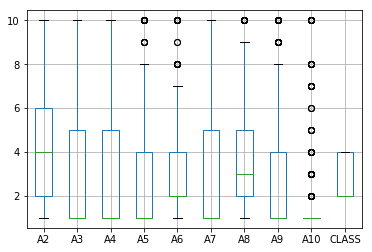

In [138]:
print("Boxplot of Variables:", "\n", data.boxplot())

## Explanatory Data Analysis 

### From the Summary Statistics, we can observe that the variable A10 has variable very close to 1 or just 1. We can use data imputing technique to replace the higher values in this column by its mean.

### A review of the variation within each variable shows that A7 has a considerable amount of variation and represents a clear candidate for standardization in future analysis. Variables A3 and A9 also stand out for the amount of variation they contain and could benefit from standardization

### A series of 9 histograms which categorize and count the values in each column

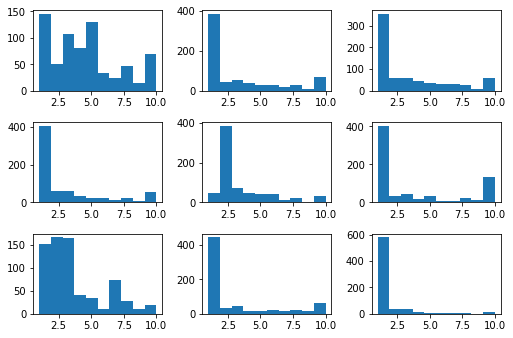

In [139]:
#Plotting 9 histograms, one for each column
fig1, axs = plt.subplots(3,3)

axs[0,0].hist(data.loc[:,'A2'])
axs[0,1].hist(data.loc[:,'A3'])
axs[0,2].hist(data.loc[:,'A4'])
axs[1,0].hist(data.loc[:,'A5'])
axs[1,1].hist(data.loc[:,'A6'])
axs[1,2].hist(data.loc[:,'A7'])
axs[2,0].hist(data.loc[:,'A8'])
axs[2,1].hist(data.loc[:,'A9'])
axs[2,2].hist(data.loc[:,'A10'])
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

### The Bar Plot for the CLASS column to count the number of benign and malignant tumors.

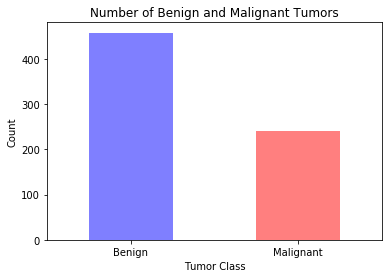

In [140]:
#Plotting Bar Graph for CLASS
data['CLASS'].value_counts().plot.bar(color=['blue','red'],alpha=0.5)
plt.ylabel('Count')
plt.xlabel('Tumor Class')
plt.title('Number of Benign and Malignant Tumors')
plt.xticks(np.arange(2), ('Benign', 'Malignant'),rotation=0)
plt.show()

### The Scatterplot comparing the values in the Clump Thickness and Mitoses columns

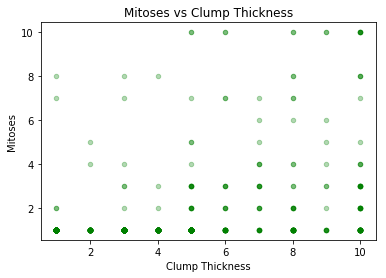

In [141]:
#Plotting ScatterPlot 
data.plot(kind='scatter',x='A2',y='A10',alpha=0.3,color='green')
plt.ylabel('Mitoses')
plt.xlabel('Clump Thickness')
plt.title('Mitoses vs Clump Thickness')
plt.show()

## Phase II

### Drop the 'Class' column from dataset for clustering

In [142]:
cluster_data = data.drop(['CLASS'], axis = 1)

### Create KMeans Model with 4 Clusters

In [143]:
model = KMeans(n_clusters=4)

### Fit KMeans Model to Data

In [144]:
model.fit(cluster_data)
labels = model.predict(cluster_data)

### Create and print the KMeans Model Centroids

In [145]:
centroids = model.cluster_centers_
print(centroids)

[[7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


### Create a range from 1 to 15 and an empty list for inertias values

In [146]:
ks = range(1,15)
inertias = []

### Use a loop to calculate KMeans for each value

In [147]:
for k in ks:
    model2 = KMeans(n_clusters = k)
    
    model2.fit(cluster_data)
    
    inertias.append(model2.inertia_)

### Plot Range and Inertia

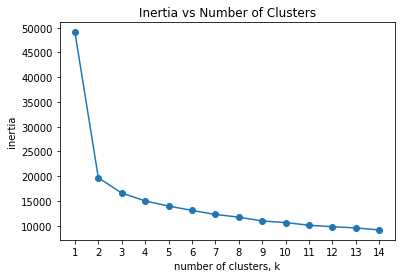

In [148]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Inertia vs Number of Clusters')
plt.show()

### To find the ideal number of clusters, we need to examine the inertia vs number of clusters plot.  A good clustering has low inertia.  However, we also do not want too many clusters.  To do this, we look for an elbow in the plot.  This is a place where the inertia begins to decrease more slowly.  Looking at the plot, the optimal number of clusters should be 3.

### Apply standard deviation function for columns A2-A10

In [149]:
stddev=cluster_data.std(axis = 0)
type(stddev)

pandas.core.series.Series

In [150]:
sd=pd.DataFrame({'Variable':stddev.index, 'Standard Deviation':stddev.values})
sd

,Variable,Standard Deviation
0,A2,2.815741
1,A3,3.051459
2,A4,2.971913
3,A5,2.855379
4,A6,2.214300
5,A7,3.601852
6,A8,2.438364
7,A9,3.053634
8,A10,1.715078


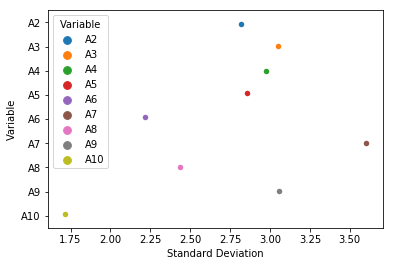

In [151]:
std_dev_plot = sns.stripplot(x='Standard Deviation',y='Variable', data = sd, jitter=True, size=5.5, hue='Variable')

#### We could see that the spread of data from the above boxplot. We could notice that variable A7 has the highest variation followed by A9, A3 and A4 respectively. The above plots show the spread of data 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


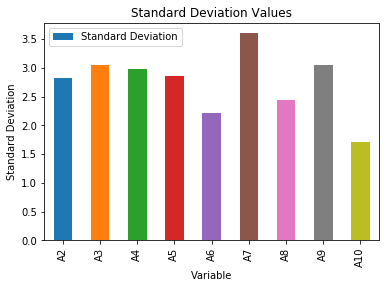

In [152]:
sd.t=sd.T
sd.plot.bar('Variable','Standard Deviation')
plt.title('Standard Deviation Values')
plt.xlabel('Variable')
plt.ylabel('Standard Deviation')
plt.show()

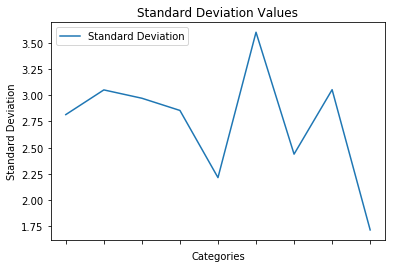

In [153]:
sd.plot('Variable','Standard Deviation')
plt.title('Standard Deviation Values')
plt.xlabel('Categories')
plt.ylabel('Standard Deviation')
plt.show()

### Above plots shows the individual vratiable stadnard deviation and we could clearly see that variable A7 has the highest varation

### Implement Normalization

In [154]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(cluster_data)
new_labels = pipeline.predict(cluster_data)
new_centroids = pipeline.named_steps['kmeans'].cluster_centers_
print(new_centroids)

[[-0.51945334 -0.61728918 -0.61702732 -0.52103625 -0.53370405 -0.60430508
  -0.56576652 -0.54283279 -0.29912703]
 [ 0.94324425  1.06056115  1.0579358   0.87929444  0.86029786  1.12907601
   1.00835139  0.92952452  0.03297812]
 [ 1.16860808  1.75960552  1.77223164  1.58294095  1.86961155  1.16430087
   1.3895322   1.56650375  3.80910288]]


## Phase 3

## Cluster Revision

#### Produce revised KMeans model by changing iteration to 500, initial centroids to 20, number of clusters to 2, and running it over the data from Phase 1

In [155]:
revised_model = KMeans(n_clusters=2, max_iter=500, n_init=20, random_state=0)
revised_model.fit(data)
labels = revised_model.predict(data)

### DataFrame

#### Create a new column in your dataframe and add Kmeans labels.
#### Change labels values so that 0 becomes 2 and 1 becomes 4.
#### Print the first 15 records from your dataframe

In [156]:
data['labels'] = labels
data['labels'] = data['labels'].astype(str)
data['labels'] = data['labels'].replace({'0':'2','1':'4'})
data['labels'] = pd.to_numeric(data['labels'])
print(data[1:16])

         A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS  labels
Scn                                                          
1002945   5   4   4   5   7  10.0   3   2    1      2       4
1015425   3   1   1   1   2   2.0   3   1    1      2       2
1016277   6   8   8   1   3   4.0   3   7    1      2       4
1017023   4   1   1   3   2   1.0   3   1    1      2       2
1017122   8  10  10   8   7  10.0   9   7    1      4       4
1018099   1   1   1   1   2  10.0   3   1    1      2       2
1018561   2   1   2   1   2   1.0   3   1    1      2       2
1033078   2   1   1   1   2   1.0   1   1    5      2       2
1033078   4   2   1   1   2   1.0   2   1    1      2       2
1035283   1   1   1   1   1   1.0   3   1    1      2       2
1036172   2   1   1   1   2   1.0   2   1    1      2       2
1041801   5   3   3   3   2   3.0   4   4    1      4       2
1043999   1   1   1   1   2   3.0   3   1    1      2       2
1044572   8   7   5  10   7   9.0   5   5    4      4       4
1047630 

In [157]:
labels_class = data.groupby('labels')['CLASS'].value_counts()
labels_class

labels  CLASS
2       2        447
        4         15
4       4        226
        2         11
Name: CLASS, dtype: int64

## Develop formula for calculating error rates

#### Benign Error Rate Calculation

In [158]:
benign_false_preds = labels_class.xs((4,2), level=('labels','CLASS')).iloc[-1]
total_benign_preds = labels_class.xs((2,2), level=('labels','CLASS')).iloc[-1] + labels_class.xs((4,2), level=('labels','CLASS')).iloc[-1]
benign_error_rate = benign_false_preds / total_benign_preds

In [159]:
benign_error_rate

0.024017467248908297